# Reconocimiento de Patrones

## Investigación II

## Métodos de Aprendizaje Supervisado

### Estudiante: Fabricio Quirós Corella

#### Febrero 2019


### Resumen

El presente expone la implementación de una serie de métodos de aprendizaje supervisado sobre una base de datos relativa a características de una cantidad importante de muestras de audio disponibles en el servicio de *streaming* denominado Spotify, donde se pretende realizar la predición de una salida, precisamente una clase binaria que determina si cierta canción es del agrado o no del sistema pre-entrenado con un conjunto de atributos asociados a dichas piezas musicales. A continuación, se definen ciertos aspectos instroductorios al trabajo realizado, luego se exponen los detalles sobre el manejo de los sets de datos y la aplicación de cada uno de los métodos de aprendizaje supervisado, junto con sus respectivos resultados.

### Preliminares

* Llamadas a librerías básicas en el análisis de datos

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib import figure

%matplotlib inline

* Obtención de la base de datos: un set de datos de 2017 canciones con attributos de la API de Spotify  (Fuente: https://www.kaggle.com/geomack/spotifyclassification).

In [2]:
df = pd.read_csv("spotifyclassification.csv").drop(columns={'Unnamed: 0'})

* Dimensiones de la base de datos de preferencia.

In [3]:
print("Spotify Musical Taste Classification - Data base:", df.shape, "rows/columns\n")

Spotify Musical Taste Classification - Data base: (2017, 16) rows/columns



* Totalidad de atributos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(4), object(2)
memory usage: 252.2+ KB


* Cada canción que se encuentra etiquetada con "1", implica que es del agrado del facilitador de la base de datos, mientas que si el *track* tiene un "0", ocurre el caso contrario.

In [5]:
dislike = df.loc[df['target'] == 0]

dislike[['artist','song_title', 'target']].tail(20)

,artist,song_title,target
1997,The Chainsmokers,Don't Let Me Down - Zomboy Remix,0
1998,Alan Walker,Faded - Slushii Remix,0
1999,Tommie Sunshine,Can't Get Enough - Pegboard Nerds Remix,0
2000,San Holo,Light - Loosid Remix,0
2001,The Chainsmokers,Something Just Like This - ARMNHMR Remix,0
2002,Steve Aoki,Without U,0
2003,Borgeous,Hold Up,0
2004,Lost Kings,Phone Down - Dodge & Fuski Remix,0
2005,Elliphant,Spoon Me - Slushii Remix,0
2006,Martin Garrix,Scared To Be Lonely (Conro Remix),0


In [6]:
like = df.loc[df['target'] == 1]

like[['artist','song_title', 'target']].tail(20)

,artist,song_title,target
1000,Skepta,No Security,1
1001,Saskilla,Fam,1
1002,Stormzy,Mr Skeng,1
1003,Bugzy Malone,Beauty and the Beast,1
1004,Lethal Bizzle,I Win,1
1005,J HUS,Plottin,1
1006,Bugzy Malone,M.E.N,1
1007,Stormzy,Cold,1
1008,Jaykae,Toothache,1
1009,Chip,Coward,1


* La idea es construir un clasificador capaz de predecir el gusto musical a partir de una serie de atributos asociados a tales piezas.

### Manejo de set de datos

* Se cargan librerías de utilidad con el propósito de conjuntar el set de entrenamiento y de pruebas

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()

* Se extrae el *target* a estimar; en este caso, la preferencia sobre una canción en particular. Además, se descargan las columnas con los atributos que se muestran a continuación.

In [8]:
y=df['target']
X=df.drop(['target', 'artist', 'song_title'], axis=1)

* Esta base de datos cuenta con 13 atributos para las muestras de audio, son las siguientes:

In [9]:
print("X (Input) - Attributes:")
X.info()

X (Input) - Attributes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 13 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
dtypes: float64(10), int64(3)
memory usage: 204.9 KB


* Retorna tanto el *input-set* como el *output-set* para el entrenamiento (entradas y salidas conocidas) y ejecución de las pruebas (entradas a aplicar y salidas a estimar, datos nuevos) para el modelo.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train/Test dataset sizes
print("Training size\t:\t",len(X_train),"\nTest Size\t:\t",len(X_test))

Training size	:	 1613 
Test Size	:	 404


### 1. Clasificación: k-NN

* El primer método de aprendizaje supervisado que fue tomando en cuenta corresponde al algoritmo del k-ésimo vecino más cercano, donde se considera un k=9. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Init Train/Test Scores
knn_clf_train_score = 0.0
knn_clf_test_score = 0.0

# Init Train/Test Accuracy
knn_clf_train_accuracy = []
knn_clf_test_accuracy = []

* Empleando una cantidad de vecinos igual a 9, es posible notar que el comportamiento del modelo implementado es del tipo *underfit*, por ende es posible establecer que es necesario aplicar un modelo de mayor complejidad, por ende buscando una menor cantidad de vecinos *k*.

 --- Results: k-NN Classification --- 

Training score	:	 0.9987600743955363 
Test score	:	 0.556930693069307

Training score	:	 0.7743335399876008 
Test score	:	 0.5816831683168316

Training score	:	 0.7557346559206448 
Test score	:	 0.5643564356435643

Training score	:	 0.7086174829510229 
Test score	:	 0.5767326732673267

Training score	:	 0.7154370737755734 
Test score	:	 0.5915841584158416

Training score	:	 0.6906385616862988 
Test score	:	 0.5742574257425742

Training score	:	 0.6825790452572845 
Test score	:	 0.6014851485148515

Training score	:	 0.6701797892126472 
Test score	:	 0.5767326732673267


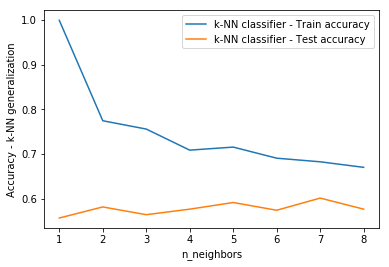

In [12]:
# Init k-neighbors setting
k = 9;
neighbors_settings = range(1,k)

print(" --- Results: k-NN Classification --- ")
for n_neighbors in neighbors_settings:
    # Multiclass conversion
    y_train_enc = lab_enc.fit_transform(y_train)
    y_test_enc = lab_enc.fit_transform(y_test)
    
    # Fit the model using X as training data and y as target values
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train_enc)    

    # Returns the "training mean accuracy" on the given test data and labels.
    knn_clf_train_score = knn_clf.score(X_train, y_train_enc)
    knn_clf_train_accuracy.append(knn_clf_train_score)
    
    # Returns the "generalization mean accuracy" on the given test data and labels.
    knn_clf_test_score = knn_clf.score(X_test, y_test_enc)
    knn_clf_test_accuracy.append(knn_clf_test_score)
    
    # Score displayment
    print("\nTraining score\t:\t", knn_clf_train_score, "\nTest score\t:\t", knn_clf_test_score)
    
# Plot accuaracy of k-NN Classifer
plt.plot(neighbors_settings, knn_clf_train_accuracy, label="k-NN classifier - Train accuracy")
plt.plot(neighbors_settings, knn_clf_test_accuracy, label="k-NN classifier - Test accuracy")
plt.ylabel("Accuracy - k-NN generalization")
plt.xlabel("n_neighbors")
plt.legend()

### 2. Clasificación: Logistic Regression

* A pesar de su nombre, *Logistic Regression* es un modelo lineal de aprendizaje supervisado para la clasificación. A continuación, se ejecuta la inicialización respectiva.

In [13]:
from sklearn.linear_model import LogisticRegression

# Model Range
C = 20
lr_range = range(1, C)

# Init Train/Test Scores
lr_clf_train_score = 0.0
lr_clf_test_score = 0.0

# Init Train/Test Accuracy
lr_clf_train_accuracy = []
lr_clf_test_accuracy = []

* Gráfico del training score vs test score para diversos valores de **C.** En este análisis, es posible notar que a pesar de aplicar un barrido en valores de **C**, el clasificador de *Logistic Regression* mantiene un comportamiento *underfit*.


Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.5371287128712872

Training score	:	 0.5399876007439554 
Test score	:	 0.537128712

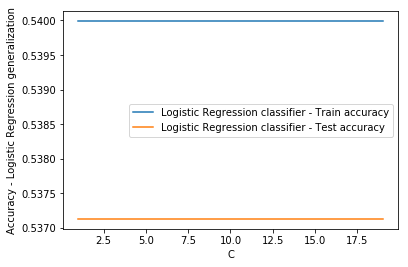

In [14]:
for c in lr_range:
    # Multiclass conversion
    y_train_enc = lab_enc.fit_transform(y_train)
    y_test_enc = lab_enc.fit_transform(y_test)
    
    # Fit the model according to the given training data.
    lr_clf = LogisticRegression(C=c, solver='liblinear').fit(X_train, y_train_enc)
    
    # Returns the "training mean accuracy" on the given test data and labels.
    lr_clf_train_score = lr_clf.score(X_train, y_train_enc)
    lr_clf_train_accuracy.append(lr_clf_train_score)
    
    # Returns the "generalization mean accuracy" on the given test data and labels.
    lr_clf_test_score = lr_clf.score(X_test, y_test_enc)
    lr_clf_test_accuracy.append(lr_clf_test_score)

    # Score displayment
    print("\nTraining score\t:\t", lr_clf_train_score, "\nTest score\t:\t", lr_clf_test_score)
    
# Plot accuaracy of k-NN Classifer
plt.plot(lr_range, lr_clf_train_accuracy, label="Logistic Regression classifier - Train accuracy")
plt.plot(lr_range, lr_clf_test_accuracy, label="Logistic Regression classifier - Test accuracy")
plt.ylabel("Accuracy - Logistic Regression generalization")
plt.xlabel("C")
plt.legend()

* Se construye nuevamente el modelo de *LogisticRegression* y se realiza la predicción a partir de dicho modelo de clasificación, evidenciando nuevamente el *underfit* reportado.

In [15]:
# Fit the model according to the given training data.
lr_clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# Returns the "training mean accuracy" on the given test data and labels.
lr_clf_train_score = lr_clf.score(X_train, y_train)

# Returns the "generalization mean accuracy" on the given test data and labels.
lr_clf_test_score  = lr_clf.score(X_test, y_test)

# RESULTS
print(" --- Resutls: Logistic Regression Classification --- ")

# Score displayment
print("\nTraining score\t:\t", lr_clf_train_score)
print("Test score\t:\t", lr_clf_test_score)

# Perform classification on an array of test vectors X.
print("\n--- Musical taste prediction (TRAIN) ---")
print(lr_clf.predict(X_train))

print("\n--- Musical taste prediction (TEST) ---")
print(lr_clf.predict(X_test))

 --- Resutls: Logistic Regression Classification --- 

Training score	:	 0.5399876007439554
Test score	:	 0.5371287128712872

--- Musical taste prediction (TRAIN) ---
[1 1 1 ... 1 1 1]

--- Musical taste prediction (TEST) ---
[1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1
 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0
 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1
 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1
 1 0 0 0 1 1 1 1 0 1 0 0

### 3. Clasificación: Usando la Regresión tipo RIDGE

* Implementación de un clasificador basado en el algoritmo de regresión de RIDGE.

In [16]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import RidgeClassifier

# Init Train/Test Scores
kr_reg_train_score = 0.0
kr_reg_test_score = 0.0

rid_clf_train_score = 0.0
rid_clf_test_score = 0.0

* A continuación, se implementa el modelo para el clasificador mencionado, donde se obtienen los puntajes asociados a la predicción del set de entrenamiento y de pruebas, y es posible observar un comportamiento *underfit*; finalmente, se somete el modelo a la ejecución de la predcción respectiva.

In [17]:
# Classifier using Ridge regression.
rid_clf = RidgeClassifier(alpha=1.0).fit(X_train, y_train)

# Returns the "training mean accuracy" on the given test data and labels.
rid_clf_train_score = rid_clf.score(X_train, y_train)
# Returns the "generalization mean accuracy" on the given test data and labels.
rid_clf_test_score = rid_clf.score(X_test, y_test)

# RESULTS
print(" --- Results: Ridge Classification --- ")

# Score displayment
print("\nTraining score\t:\t", rid_clf_train_score, "\nTest score\t:\t", rid_clf_test_score)

# Predict using Ridge Classification model
print("\n--- Musical taste prediction (TRAIN) ---")
print(rid_clf.predict(X_train))

print("\n--- Musical taste prediction (TEST) ---")
print(rid_clf.predict(X_test))

 --- Results: Ridge Classification --- 

Training score	:	 0.6658400495970241 
Test score	:	 0.655940594059406

--- Musical taste prediction (TRAIN) ---
[0 1 0 ... 0 0 1]

--- Musical taste prediction (TEST) ---
[0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0
 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1
 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1
 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0
 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0

### 4. Clasificación: kernel-SVM

* Máquina de Vector de Soporte que incluye atributos no lineales, con el objetivo de hacerlo más efectivo a la hora de realizar las predicciones.

In [18]:
from sklearn.svm import SVC

# Init Train/Test Scores
svc_clf_train_score = 0.0
svc_clf_test_score = 0.0

* Ajuste del modelo deseado, donde se considera un **kernel RBF (gaussiano)**, el cual toma en cuenta todos los posibles polinomios de todos los grados, pero a mayor grado, menor relevancia tiene el atributo. Finalmente, se desplieguen los puntajes asociados al entrenamiento y a las pruebas de dicho modelo, donde cabe resaltar que dicho modelo presenta *underfitting*, por lo cual no representa un buen modelo para realizar predicciones del set de pruebas asociado.

In [20]:
# Fit the SVM model according to the given training data.
svc_clf = SVC(kernel='rbf', gamma='scale').fit(X_train, y_train)

# Returns the "training mean accuracy" on the given test data and labels.
svc_clf_train_score = svc_clf.score(X_train, y_train)

# Returns the "generalization mean accuracy" on the given test data and labels.
svc_clf_test_score  = svc_clf.score(X_test, y_test)

print(" --- Results: kernel-Suport Vector Machine Classification --- ")

print("Training score\t:\t", svc_clf_train_score)
print("Test score\t:\t", svc_clf_test_score)

# Predict the class labels for the provided data
print("\n--- Musical taste prediction (TRAIN) ---")
print(svc_clf.predict(X_train))

print("\n--- Musical taste prediction (TEST) ---")
print(svc_clf.predict(X_test))

 --- Results: kernel-Suport Vector Machine Classification --- 
Training score	:	 0.6869187848729076
Test score	:	 0.5742574257425742

--- Musical taste prediction (TRAIN) ---
[0 1 0 ... 0 1 1]

--- Musical taste prediction (TEST) ---
[0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0
 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0
 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0
 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0
 0 0 0 1 0 0 0 1

### 5. Clasificación: Random Forest

* *Random Forest* es un algoritmo de aprendizaje supervisado del tipo **ensamble** que consiste en un número de árboles de decisión clasificadores en varias sub-muestra del set de datos and que usa el promedio para mejorar la precisión de predictiva y el control del *over-fitting*.

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Init n-estimators setting
n = 100;

# Init Train/Test Scores
rf_clf_train_score = 0.0
rf_clf_test_score = 0.0

* Seguidamente, se construye el clasificador de *Random Forest*, el cual es ajustado al set de entrenamiento respectivo, para así obtener los puntajes de predicción de entrenamiento y de prueba, además de la predicción de los gustos musicales, el cual muestra un **comportamiento balanceado de generalización**, ya que posse una buena predicción tanto para el set de entrenamiento como para el pruebas.

In [23]:
# Build a forest of trees from the training set (X, y).
rf_clf = RandomForestClassifier(n_estimators=n).fit(X_train, y_train)   

# Returns the "training mean accuracy" on the given test data and labels.
rf_clf_train_score = rf_clf.score(X_train, y_train)
    
# Returns the "generalization mean accuracy" on the given test data and labels.
rf_clf_test_score = rf_clf.score(X_test, y_test)

# RESULTS
print(" --- Results: RandomForest Classification --- ")

# Score displayment
print("\nTraining score\t:\t", rf_clf_train_score, "\nTest score\t:\t", rf_clf_test_score)

# Return decision_path
print("\nTraining decision path:", rf_clf.decision_path(X_train))
print("\nTest decision path:", rf_clf.decision_path(X_test))

# The predicted regression target of an input sample is computed as the 
# mean predicted regression targets of the trees in the forest
print("\n--- Musical taste prediction (TRAIN) ---")
print(rf_clf.predict(X_train))

print("\n--- Musical taste prediction (TEST) ---")
print(rf_clf.predict(X_test))

 --- Results: RandomForest Classification --- 

Training score	:	 0.9987600743955363 
Test score	:	 0.7351485148514851

Training decision path: (<1613x49574 sparse matrix of type '<class 'numpy.int64'>'
	with 1799981 stored elements in Compressed Sparse Row format>, array([    0,   487,   978,  1477,  1946,  2441,  2964,  3511,  4042,
        4557,  5050,  5545,  6066,  6557,  7046,  7515,  8024,  8531,
        8996,  9483,  9986, 10509, 11034, 11541, 12052, 12559, 13052,
       13577, 14038, 14499, 14998, 15467, 15996, 16467, 16986, 17505,
       18028, 18545, 19014, 19519, 20012, 20541, 21072, 21557, 22000,
       22507, 22968, 23431, 23938, 24455, 24974, 25425, 25900, 26365,
       26874, 27345, 27822, 28285, 28728, 29249, 29708, 30177, 30640,
       31123, 31650, 32147, 32658, 33171, 33656, 34147, 34654, 35181,
       35682, 36167, 36664, 37189, 37660, 38131, 38644, 39147, 39628,
       40151, 40610, 41147, 41618, 42125, 42614, 43091, 43586, 44083,
       44568, 45047, 45546, 46037

### 6. Clasificación: AdaBoost

* Un clasificador *AdaBoost* es un estimador del tipo **ensamble**, el cual consiste inicialmente en un clasificador en el dataset original, donde luego ajusta copia adicionales del clasificador en el mismo dataset.

In [24]:
from sklearn.ensemble import AdaBoostClassifier

# Init Train/Test Scores
boost_clf_train_score = 0.0
boost_clf_test_score = 0.0

# Init n-estimators setting
n = 100;

* Construcción del clasificador *AdaBoost* empleando 100 estimadores, donde se obtienen los puntajes de predicción tanto para el set de entrenamiento como para el de pruebas, lo cual, al igual que el clasificador de *Random Forest*, refleja la capacidad de dicho modelo de aprendizaje de hacer predicciones correctas a partir del conjunto de entrenamiento

In [25]:
# Build a boosted classifier from the training set (X, y).
boost_clf = AdaBoostClassifier(n_estimators=n).fit(X_train, y_train)

# In multi-label classification, this is the subset accuracy which is a harsh metric since 
# you require for each sample that each label set be correctly predicted.

# Returns the "training mean accuracy" on the given test data and labels.
boost_clf_train_score = boost_clf.score(X_train, y_train)
# Returns the "generalization mean accuracy" on the given test data and labels.
boost_clf_test_score = boost_clf.score(X_test, y_test)

# RESULTS
print(" --- AdaBoost Classification --- ")

# Score displayment
print("\nTraining score\t:\t", boost_clf_train_score, "\nTest score\t:\t", boost_clf_test_score)

# Predict classes for X:
# The predicted class of an input sample is computed as the weighted mean prediction of 
# the classifiers in the ensemble.
print("\n--- Musical taste prediction (TRAIN) ---")
print(boost_clf.predict(X_train))

print("\n--- Musical taste prediction (TEST) ---")
print(boost_clf.predict(X_test))

 --- AdaBoost Classification --- 

Training score	:	 0.8034717916924985 
Test score	:	 0.7252475247524752

--- Musical taste prediction (TRAIN) ---
[0 1 1 ... 0 0 1]

--- Musical taste prediction (TEST) ---
[0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1
 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1
 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1
 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1
 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 

### Referencias

* https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

* https://www.kaggle.com/geomack/spotifyclassification

* https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html

* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier#

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier